In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data/train.csv')
# Set weekdays as categories
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], 
                                 categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
                                 ordered=True)
# Format Dates
df["Dates"] = pd.to_datetime(df["Dates"], format="%Y-%m-%d %H:%M:%S")
df["Day"] = df["Dates"].map(lambda x: x.day)
df["Month"] = df["Dates"].map(lambda x: x.month)
df["Year"] = df["Dates"].map(lambda x: x.year)
df["Hour"] = df["Dates"].map(lambda x: x.hour)

df.drop(columns=["Descript", "Resolution", "Dates"], inplace=True)
df = df[["DayOfWeek", "Day", "Month", "Year", "Hour", "PdDistrict", "Address", "X", "Y", "Category"]]
df.head()

,DayOfWeek,Day,Month,Year,Hour,PdDistrict,Address,X,Y,Category
0,Wednesday,13,5,2015,23,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,WARRANTS
1,Wednesday,13,5,2015,23,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES
2,Wednesday,13,5,2015,23,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,OTHER OFFENSES
3,Wednesday,13,5,2015,23,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,LARCENY/THEFT
4,Wednesday,13,5,2015,23,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,LARCENY/THEFT


In [8]:
df['Category'].isnull().values.any()

np.False_

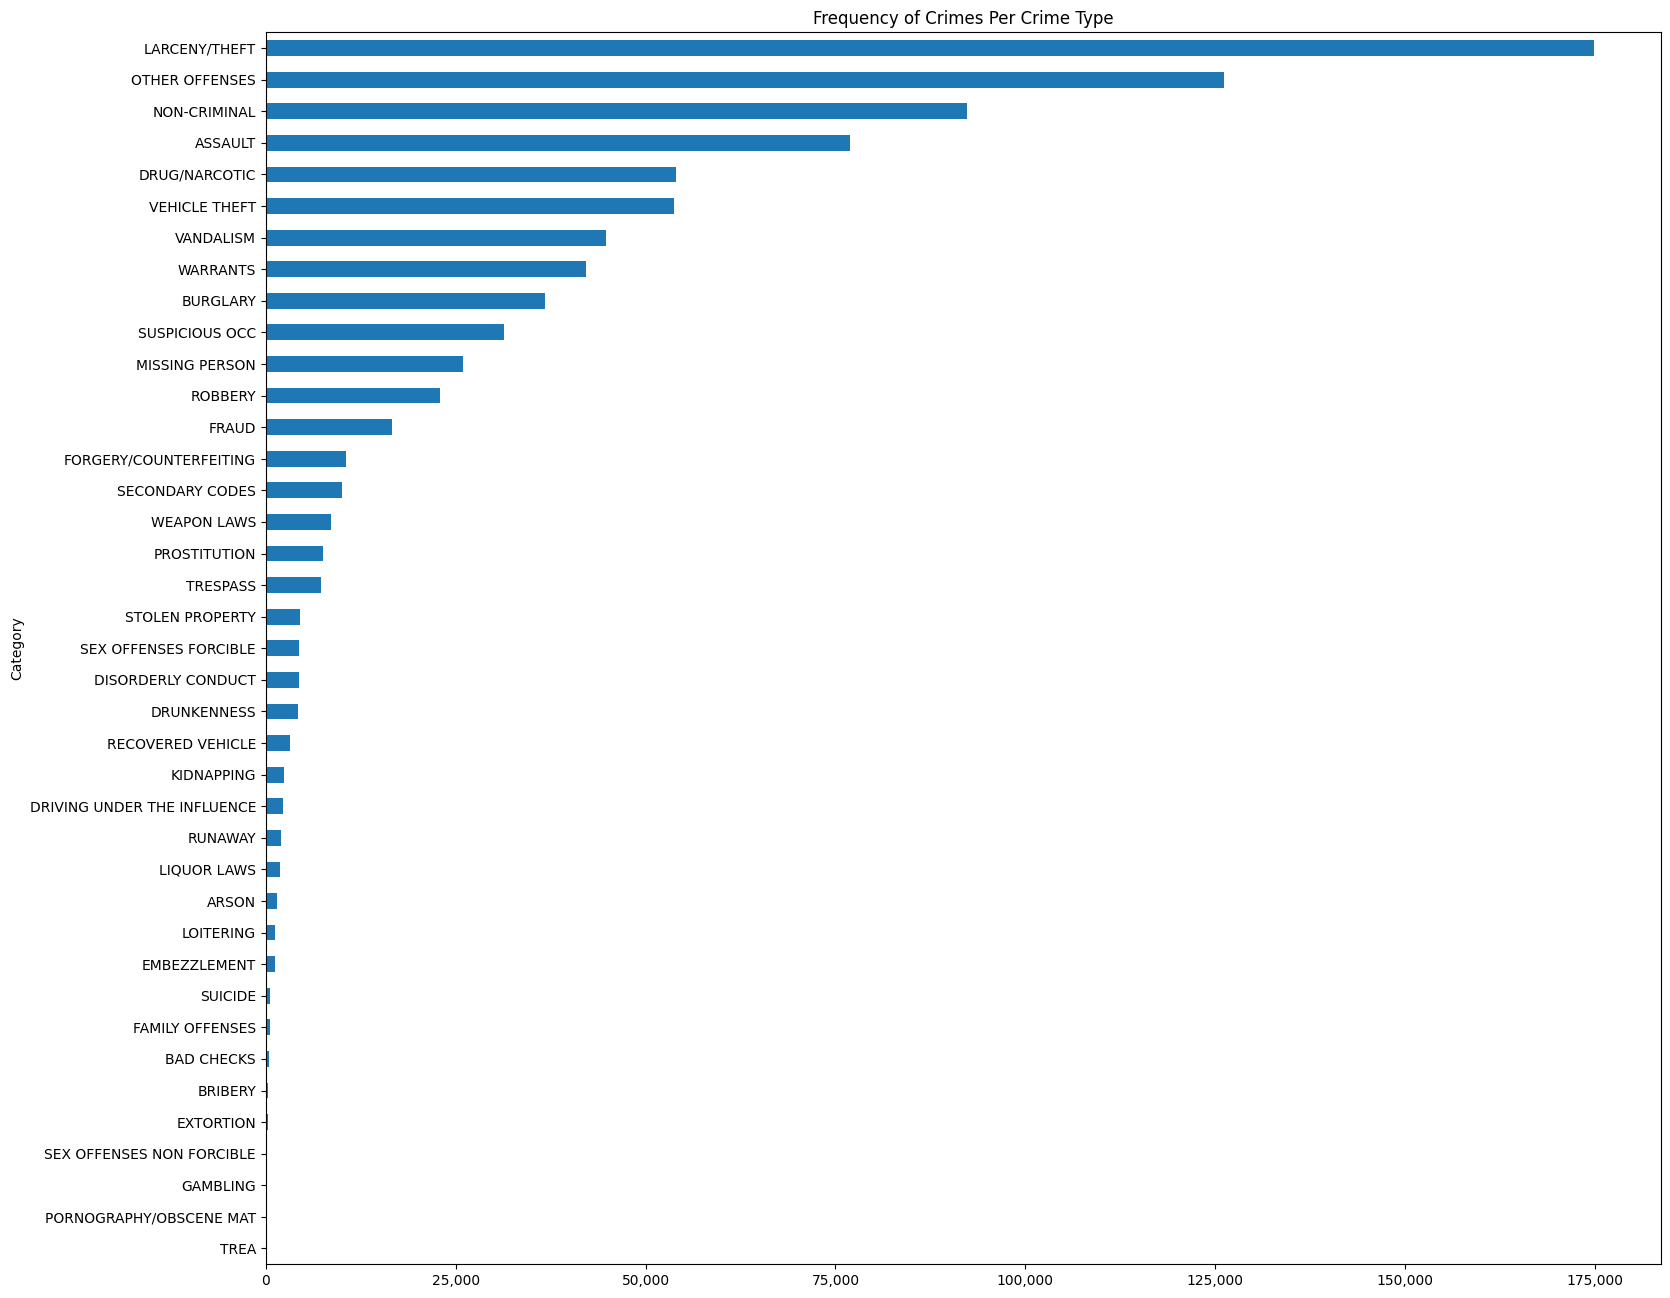

In [11]:
crime_type_df = df['Category'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

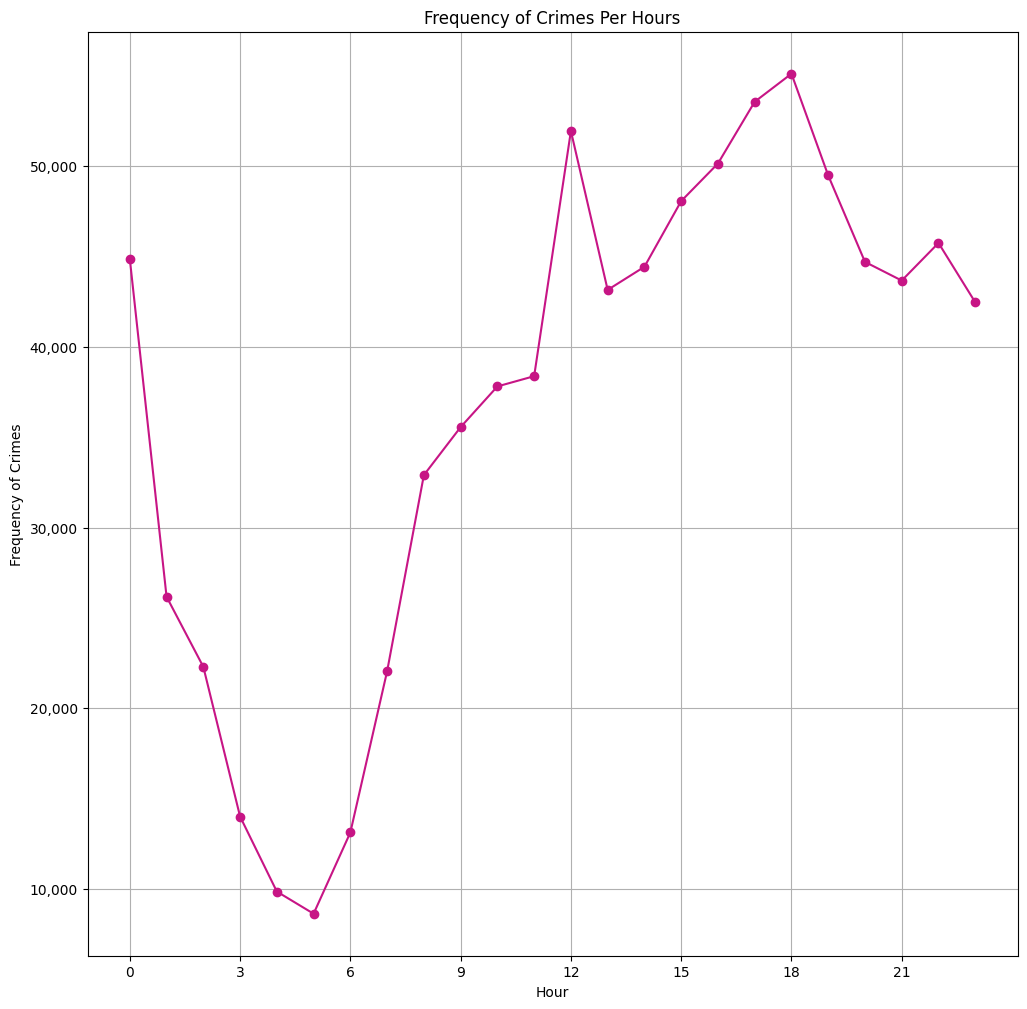

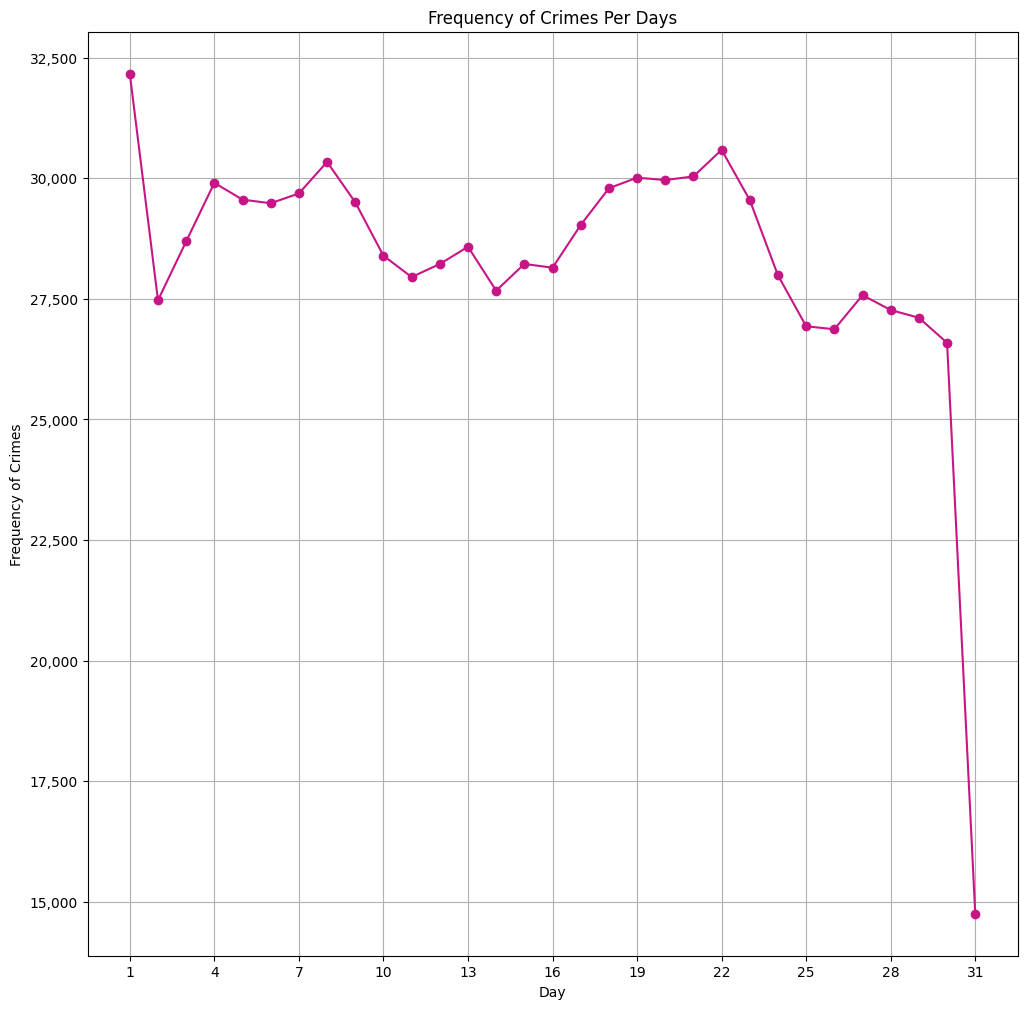

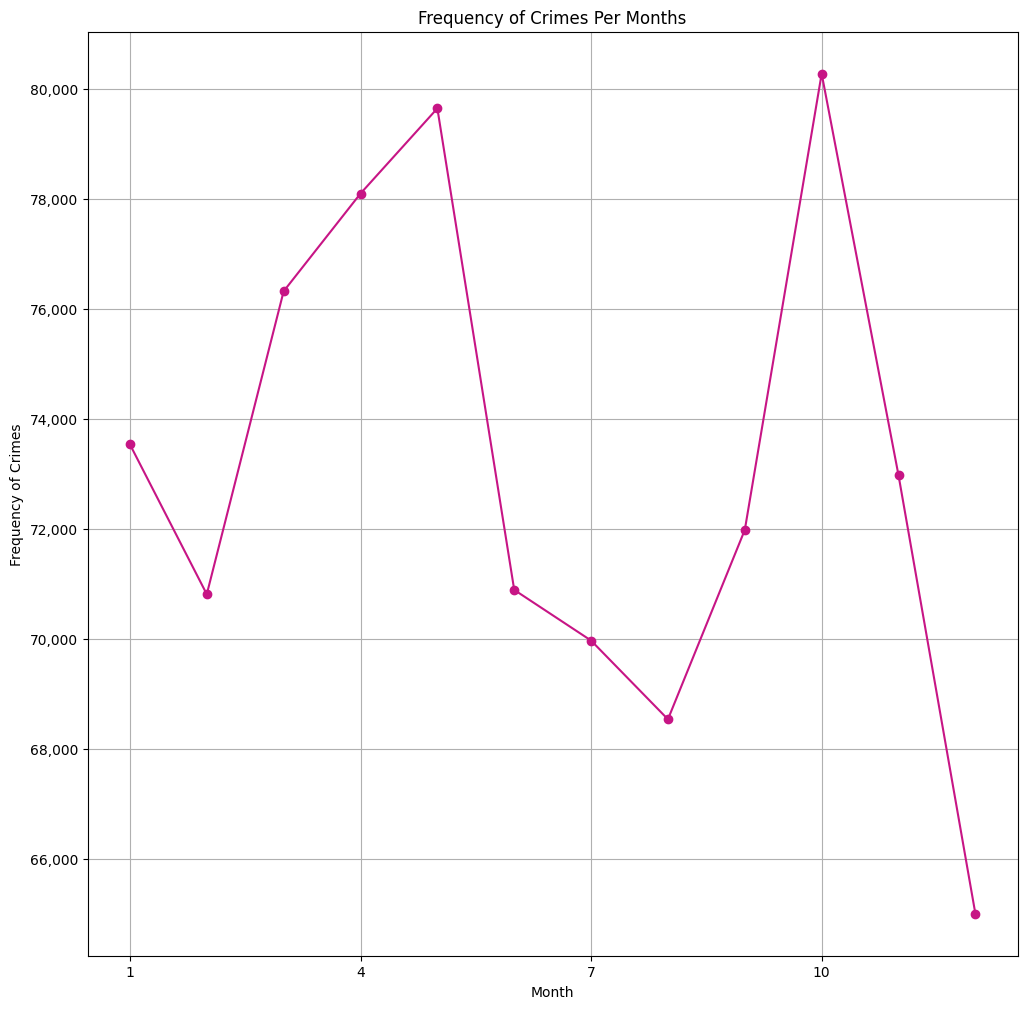

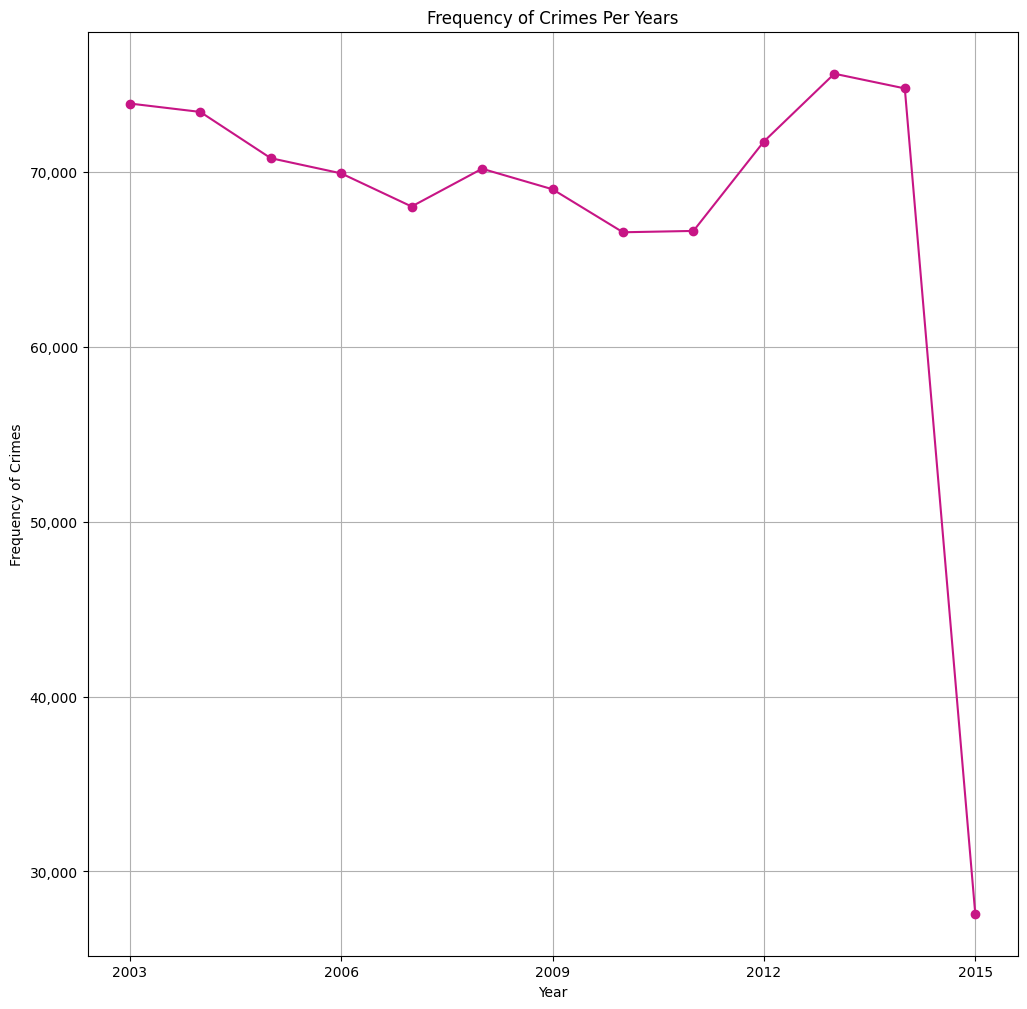

In [22]:
def plotCrimePer(time_feature: str):
    crime_per_time = df[time_feature].value_counts().sort_index()
    # Plot all crimes over the 24 hours
    fig=plt.figure(figsize=(12, 12))

    plt.title("Frequency of Crimes Per " + time_feature + "s")
    plt.xlabel("Time of Crime")
    plt.ylabel("Frequency of Crimes")

    ax = crime_per_time.plot(grid=True, marker='o', color='mediumvioletred')

    ax.set_xticks(crime_per_time.index[::3])

    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: x))
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plotCrimePer("Hour")
plotCrimePer("Day")
plotCrimePer("Month")
plotCrimePer("Year")